In [1]:
# import necessary libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 
plt.style.use('fivethirtyeight') 

# view all columns 
pd.set_option('display.max_columns', None)

In [2]:
path = r'C:\Users\OJO Timilehin\Documents\Portfolio Dataset\ML Classification\bank_marketing/bank-full.csv'
bank = pd.read_csv(path)
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
# shape of the dataset 
bank.shape

(45211, 17)

In [4]:
# null values 
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

- There is no null value, this dataset is clean.

In [5]:
# datatypes and number of unique values 
for feature in bank.columns: 
    print(f'{feature}: {bank[feature].dtype}, {bank[feature].nunique()} unique values')

age: int64, 77 unique values
job: object, 12 unique values
marital: object, 3 unique values
education: object, 4 unique values
default: object, 2 unique values
balance: int64, 7168 unique values
housing: object, 2 unique values
loan: object, 2 unique values
contact: object, 3 unique values
day: int64, 31 unique values
month: object, 12 unique values
duration: int64, 1573 unique values
campaign: int64, 48 unique values
pdays: int64, 559 unique values
previous: int64, 41 unique values
poutcome: object, 4 unique values
y: object, 2 unique values


## Exploratory Data Analysis

In [6]:
bank[bank.duplicated() == True]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


- there are no duplicates in this dataset

In [7]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Dependent(Target) Variable

In [8]:
bank['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

- this dataset has an imbalanced target variable

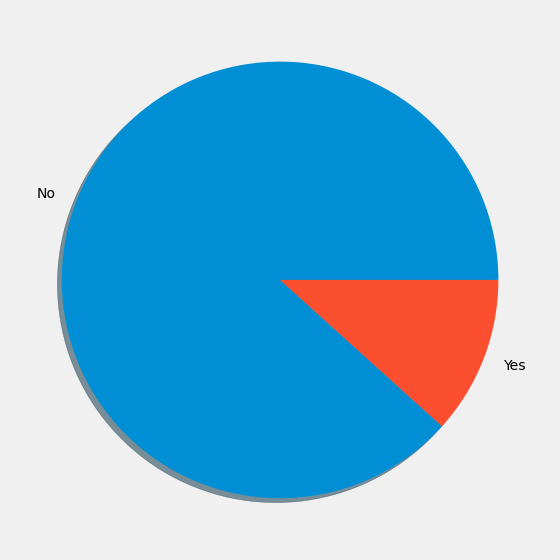

In [9]:
# pie chart
plt.figure(figsize = (8, 8))
slices = bank['y'].value_counts()
labels = ['No', 'Yes']
plt.pie(x = slices, labels = labels, shadow = True)
plt.tight_layout()
plt.show()

### Categorical Variables 

- Categorical variables in this dataset are features with unique values of 12 or less than

In [10]:
cat_var = [feature for feature in bank.columns if bank[feature].nunique() <= 12]
cat_var

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [21]:
bank[cat_var].head()

,job,marital,education,default,housing,loan,contact,month,poutcome
0,management,married,tertiary,no,yes,no,unknown,may,unknown
1,technician,single,secondary,no,yes,no,unknown,may,unknown
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown
4,unknown,single,unknown,no,no,no,unknown,may,unknown


### Cardinality of Categorical variables

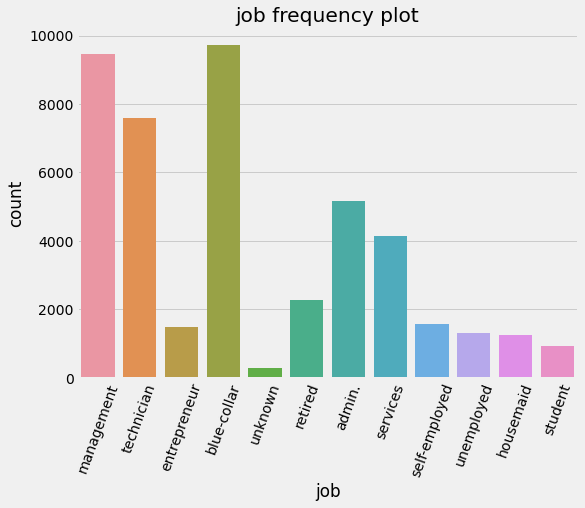

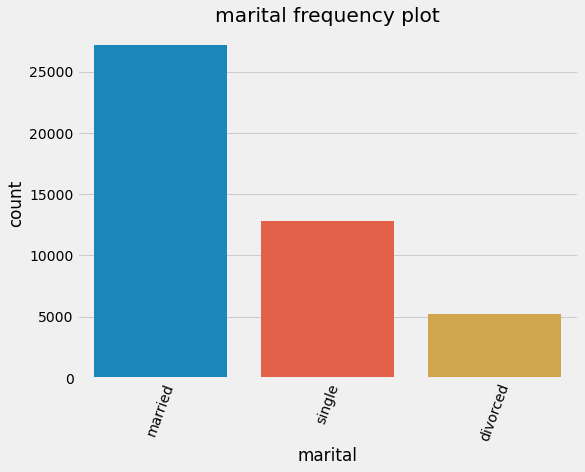

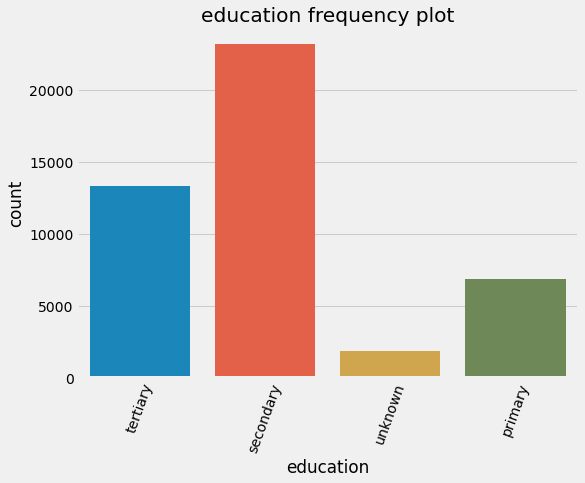

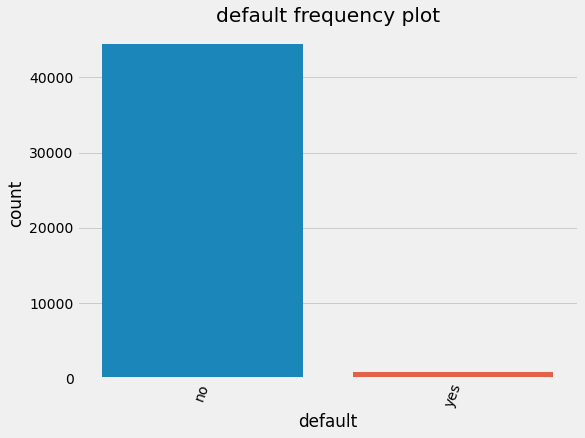

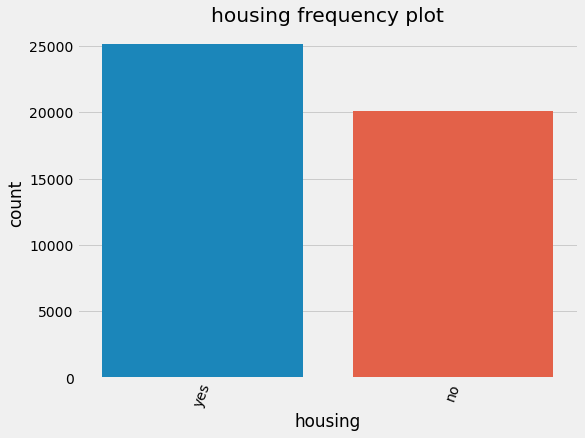

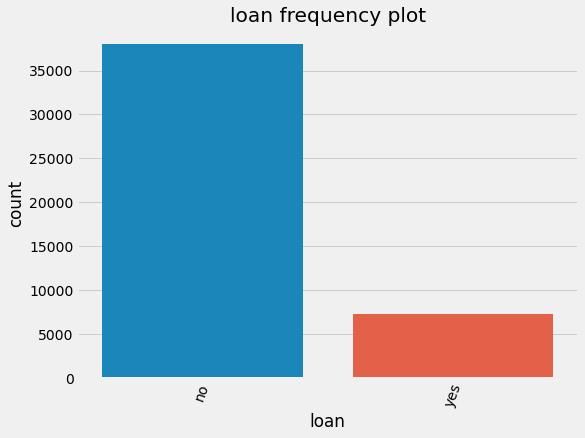

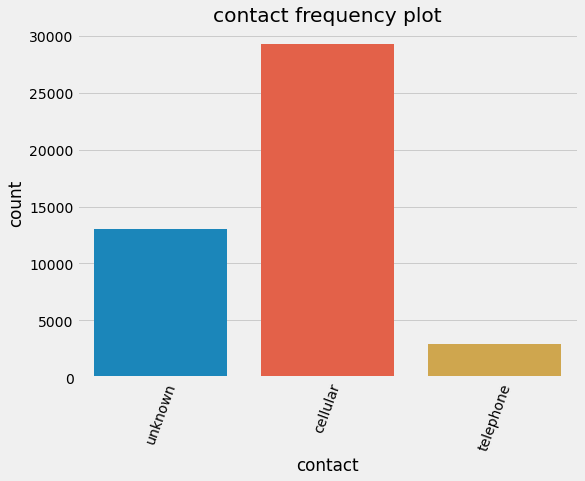

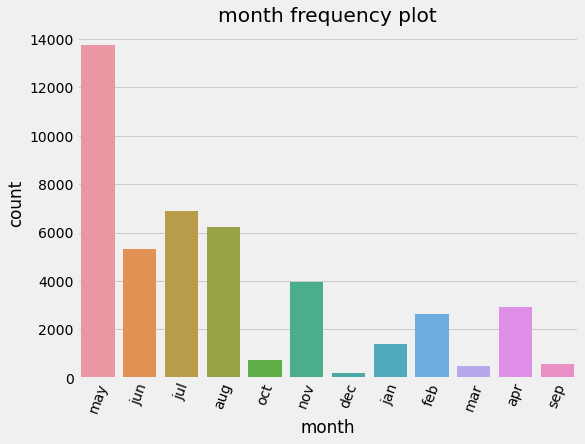

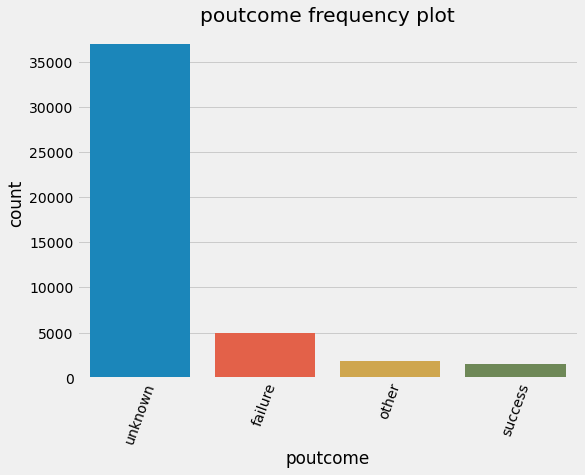

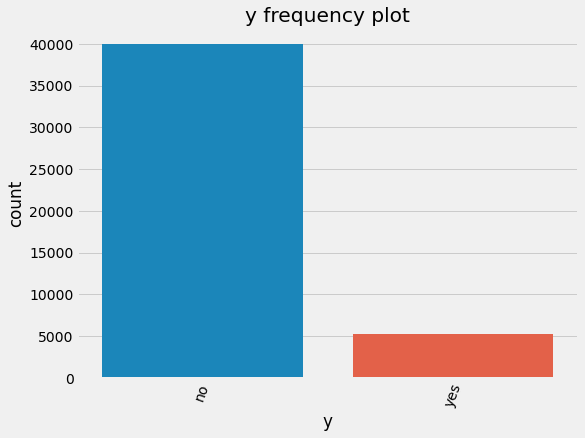

In [11]:
for feature in cat_var: 
    # make a copy of the datafrane 
    data = bank.copy()
    # plot a bar chart 
    plt.figure(figsize = (8, 6))
    sns.countplot(x = feature, data = data)
    plt.title(f'{feature} frequency plot') 
    plt.xticks(rotation = 70)
    plt.show()

### Categorical Variable vs Target variable

In [12]:
cat_var = [feature for feature in bank.columns if bank[feature].nunique() <= 12 and feature != 'y']
cat_var

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

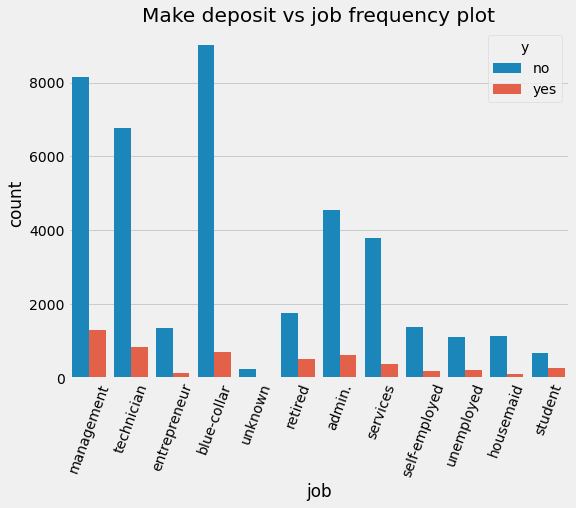

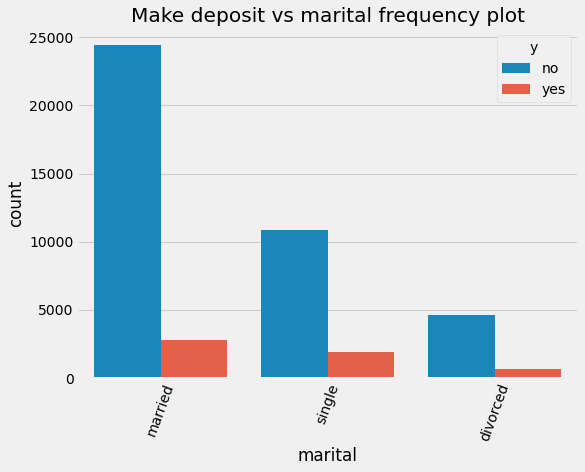

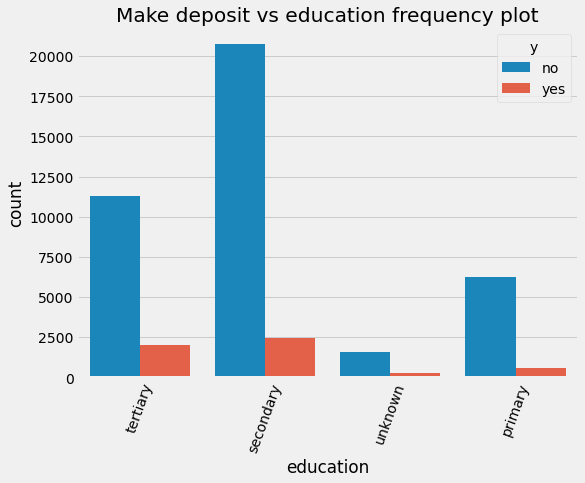

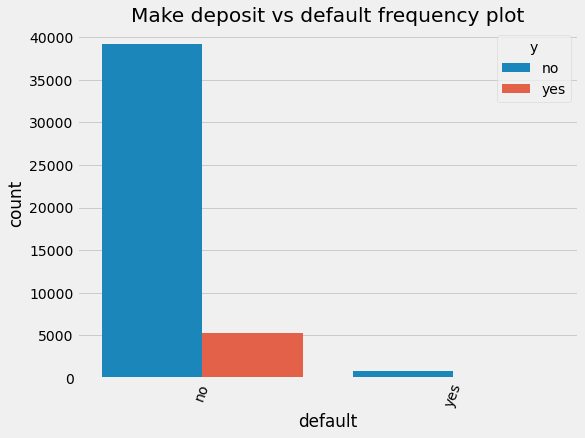

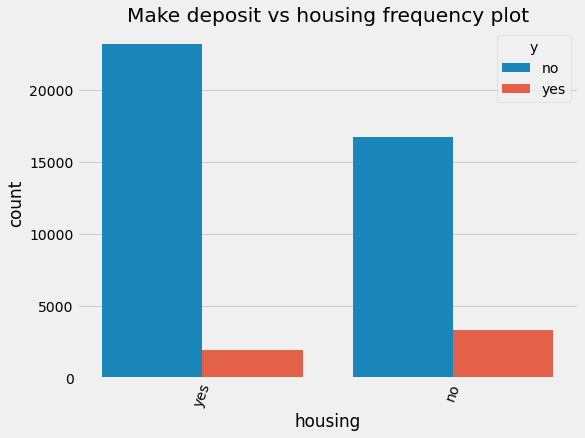

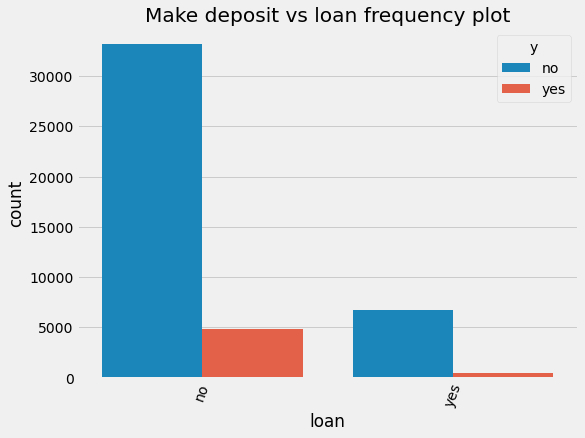

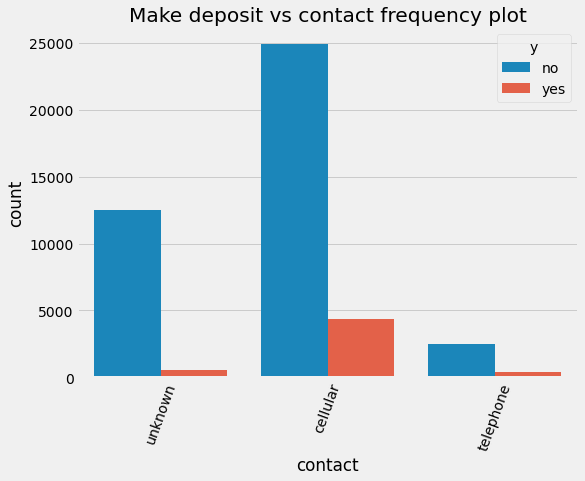

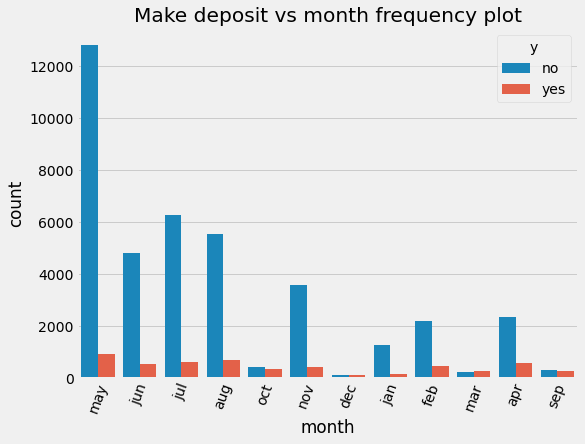

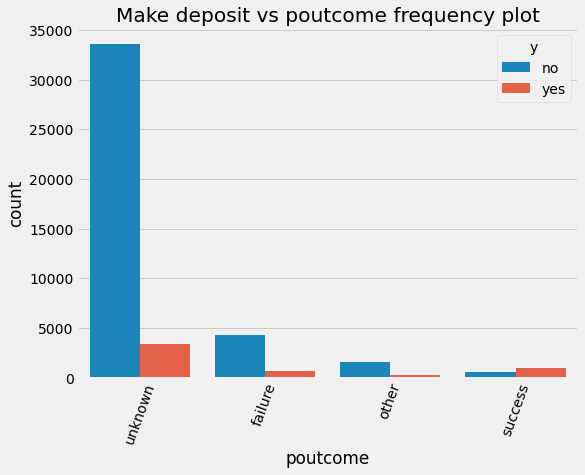

In [13]:
for feature in cat_var: 
    # make a copy of the datafrane 
    data = bank.copy()
    # plot a bar chart 
    plt.figure(figsize = (8, 6))
    sns.countplot(x = feature, data = data, hue = 'y')
    plt.title(f'Make deposit vs {feature} frequency plot') 
    plt.xticks(rotation = 70)
    plt.show()

### Numerical Variable 

- NUmerical variable in this dataset have nuque values grater than 12

In [14]:
# numerical variable
num_var = [feature for feature in bank.columns if bank[feature].nunique() > 12]
num_var

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [15]:
# top 5 records
bank[num_var].head()

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


### Histogram distribution plot

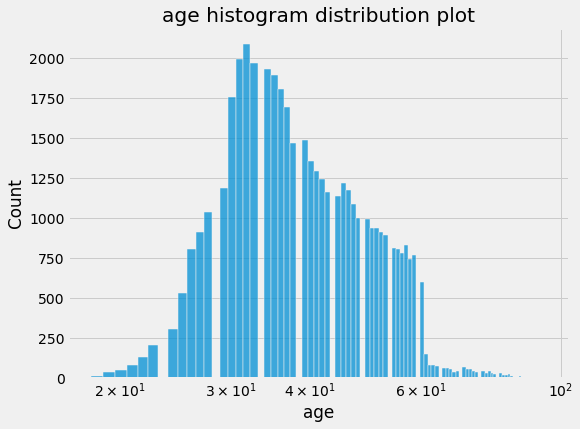

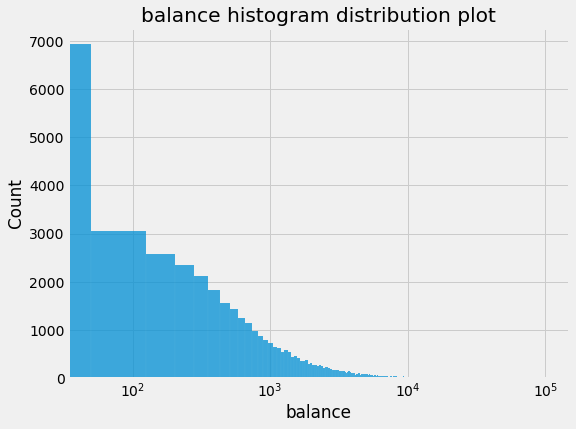

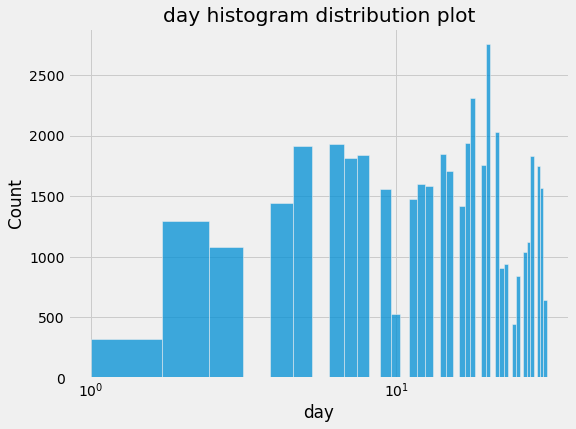

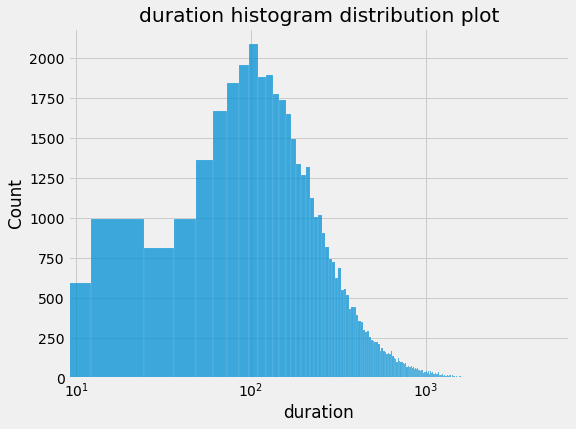

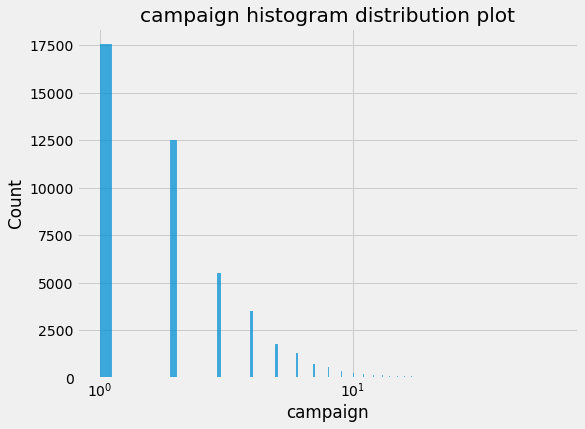

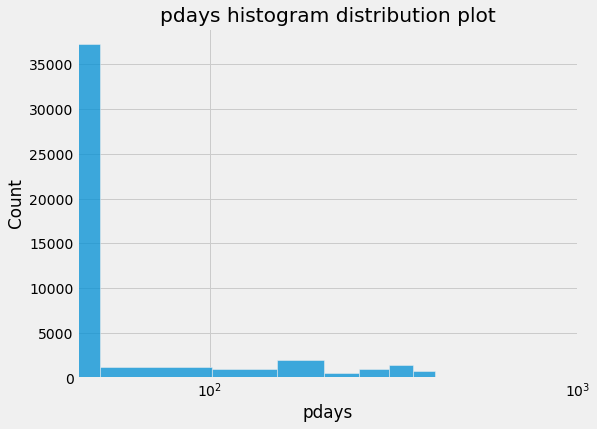

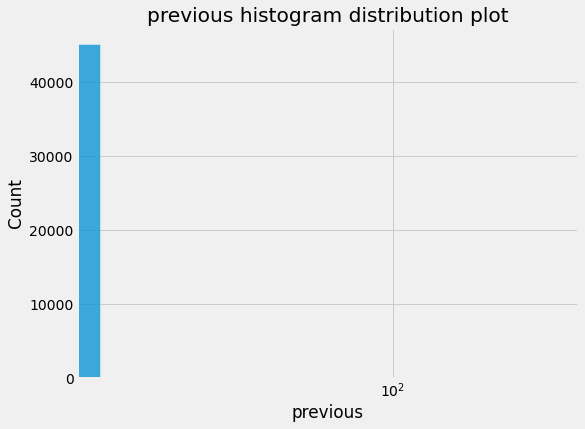

In [16]:
for feature in num_var: 
    # make a copy of the datafrane 
    data = bank.copy()
    # plot a bar chart 
    plt.figure(figsize = (8, 6))
    sns.histplot(x = feature, data = data)
    plt.xscale('log')
    plt.title(f'{feature} histogram distribution plot') 
    plt.show()

### Target variable vs Numerical Variable kde plot

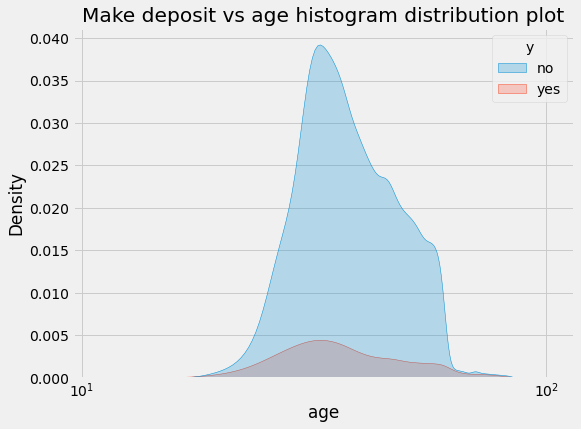

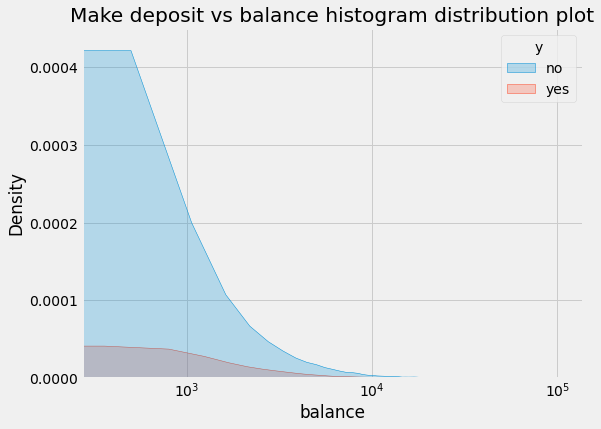

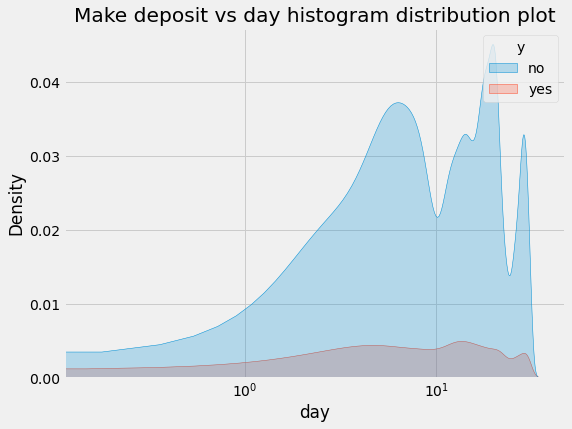

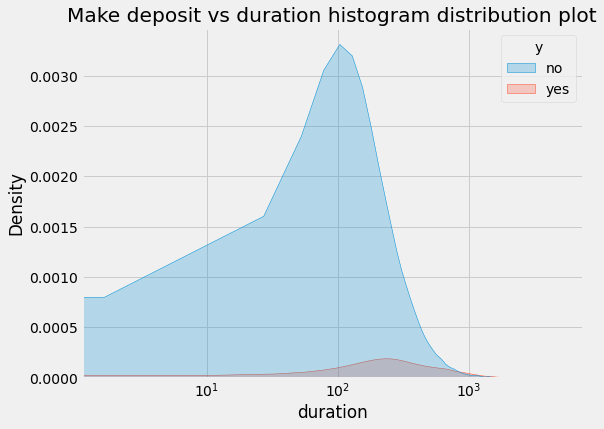

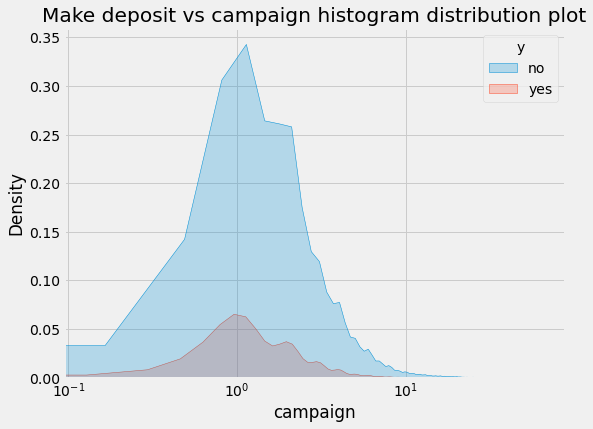

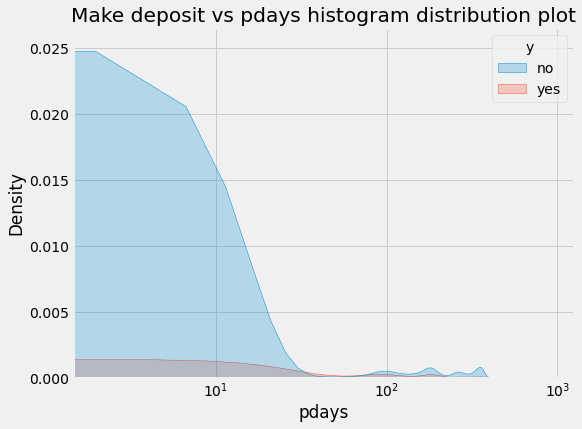

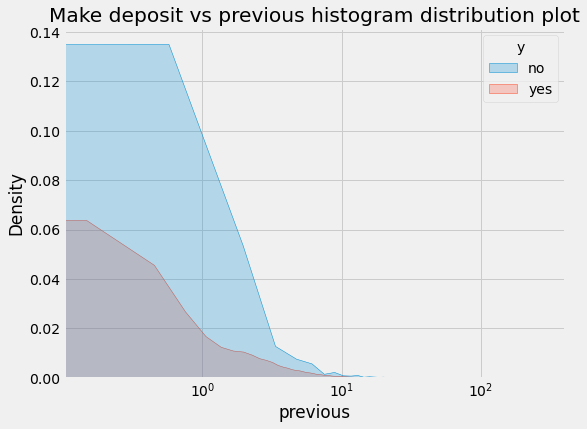

In [17]:
for feature in num_var: 
    # make a copy of the datafrane 
    data = bank.copy()
    # plot a bar chart 
    plt.figure(figsize = (8, 6))
    sns.kdeplot(x = feature, data = data, hue = 'y', fill = True)
    plt.xscale('log')
    plt.title(f'Make deposit vs {feature} histogram distribution plot') 
    plt.show()

### Boxplot: Outlier detection

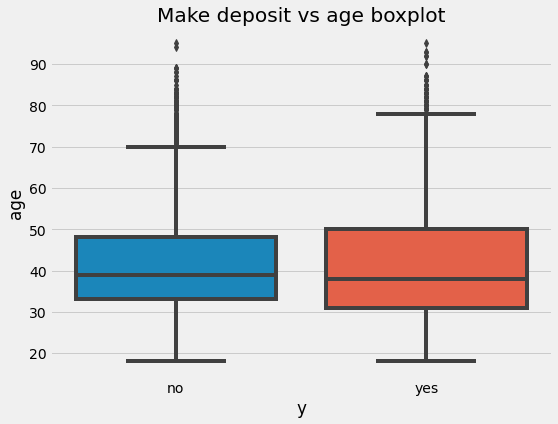

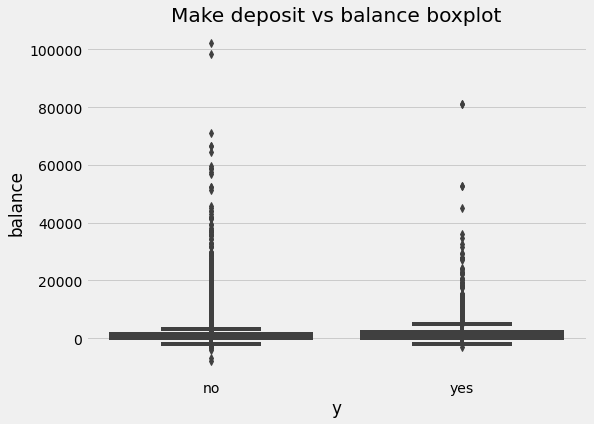

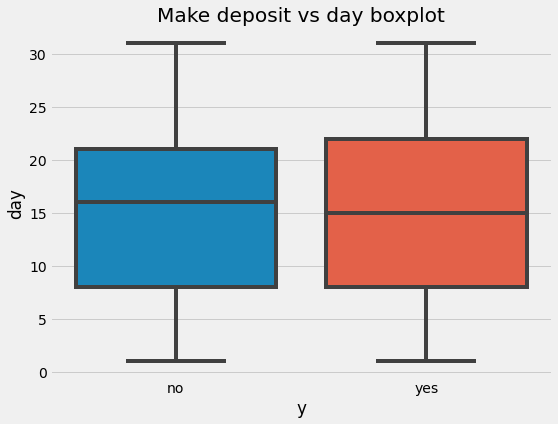

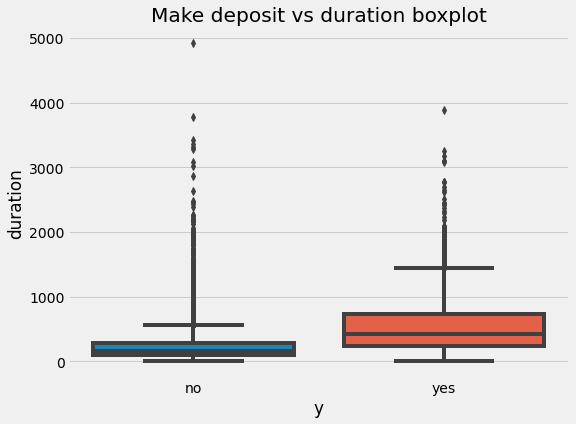

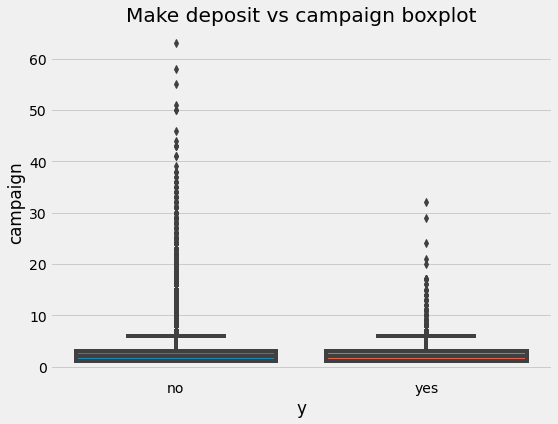

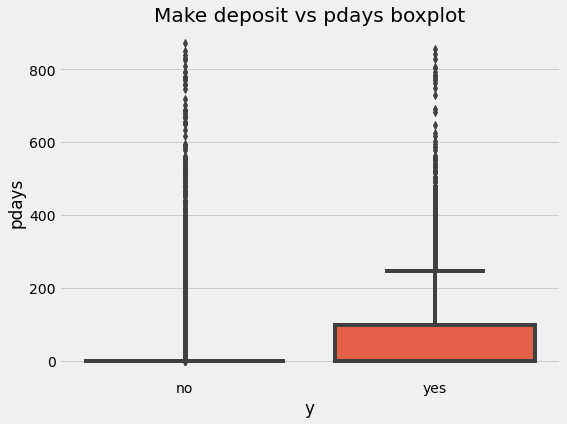

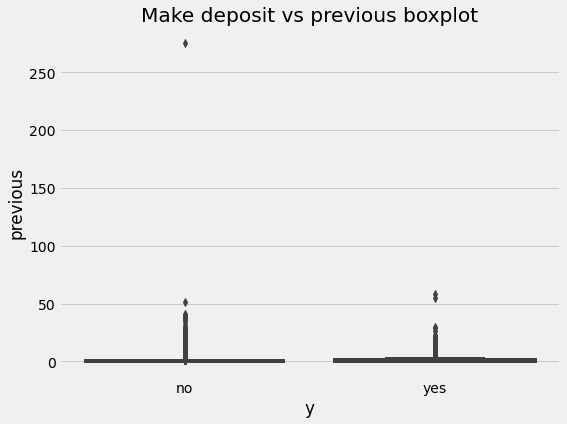

In [18]:
for feature in num_var: 
    # make a copy of the datafrane 
    data = bank.copy()
    # plot a bar chart 
    plt.figure(figsize = (8, 6))
    sns.boxplot(x = 'y', y = feature, data = data)
    plt.title(f'Make deposit vs {feature} boxplot')
    plt.show()

### Feature Engineering

In [19]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [25]:
# Frequency encoding 
# mapping each variable to the value counts 
for feature in cat_var:
    # create  dictionar for variables and value counts  
    map_dict = bank[feature].value_counts().to_dict()
    bank[feature] = bank[feature].map(map_dict)

In [26]:
# top 5 records 
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,9458,27214,13301,44396,2143,25130,37967,13020,5,13766,261,1,-1,0,36959,no
1,44,7597,12790,23202,44396,29,25130,37967,13020,5,13766,151,1,-1,0,36959,no
2,33,1487,27214,23202,44396,2,25130,7244,13020,5,13766,76,1,-1,0,36959,no
3,47,9732,27214,1857,44396,1506,25130,37967,13020,5,13766,92,1,-1,0,36959,no
4,33,288,12790,1857,44396,1,20081,37967,13020,5,13766,198,1,-1,0,36959,no


### Split the dataset

In [27]:
# dependent and independent variables 
X = bank.drop('y', axis =1)
y = bank['y']

In [ ]:
# import train test split 
from sklearn.model_selection import train_test_split 
